## 4. Models for Stationary Time Series

**Exercise 4.1**.  Use first principles to find the autocorrelation function for the stationary process defined by

$$ Y_t = 5 + e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2} $$

**Solution**. 

The variance is

$$ \gamma_0 
= \text{Var}[Y_t] 
= \text{Var}\left[ 5 + e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2} \right]
= \text{Var}[e_t] + \frac{1}{4} \text{Var}[e_{t - 1}] + \frac{1}{16} \text{Var}[e_{t-2}] 
= \frac{21}{16} \sigma_e^2
$$

and the autocovariance is

$$ \gamma_k =
\text{Cov}[Y_t, Y_{t - k}] = \text{Cov}\left[ e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2}, e_{t - k} - \frac{1}{2} e_{t - k - 1} + \frac{1}{4} e_{t - k - 2}\right]
$$

For $k = 1$,

$$ \gamma_1 = -\frac{1}{2} \text{Var}[e_{t - 1}] -\frac{1}{8} \text{Var}[e_{t - 2}] = -\frac{5}{8} \sigma_e^2 $$

For $k = 2$,

$$ \gamma_2 = \frac{1}{4} \text{Var}[e_{t - 2}] = \frac{1}{4} \sigma_e^2 $$

and the autocovariance is 0 for $k > 2$.

Therefore

$$ \gamma_k = \begin{cases}
(21 / 16) \sigma_e^2 &\text{for } k = 0 \\
-(5 / 8) \sigma_e^2 &\text{for } k = 1 \\
(1 / 4) \sigma_e^2 &\text{for } k = 2 \\
0 &\text{for } k > 2
\end{cases} $$

and the autocorrelation is

$$ \rho_k = \frac{\gamma_k}{\gamma_0} = \begin{cases}
-10 / 21 &\text{for } k = 1 \\
4 / 21 &\text{for } k = 2\\
0 &\text{for } k > 2
\end{cases} $$

**Exercise 4.2**.  Sketch the autocorrelation functions for the following MA(2) models with parameters as specified:

**(a)** $\theta_1 = 0.5$ and $\theta_2 = 0.4$.

**(b)** $\theta_1 = 1.2$ and $\theta_2 = -0.7$.

**(c)** $\theta_1 = -1$ and $\theta_2 = -0.6$.

**Solution**.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to compute autocorrelation from theta for MA(2)
def ma2_rho(theta_1, theta_2):
    def f(k):
        if k == 0:
            return 1
        if k == 1:
            return (-theta_1 + theta_1 * theta_2) / (1 + theta_1**2 + theta_2**2)
        if k == 2:
            return -theta_2 / (1 + theta_1**2 + theta_2**2)
        return 0
    
    return f

# Function to plot MA(2) autocorrelations for k = 1 to 12
def plot_ma2_acf(theta_1, theta_2):
    max_k = 12
    f = ma2_rho(theta_1, theta_2)
    k = [n for n in range(1, max_k + 1)]
    rho = [f(k) for k in range(1, max_k + 1)]
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, rho, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, rho):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(r'MA(2) ACF, $(\theta_1, \theta_2) = (' + str(theta_1) + ', ' + str(theta_2) + r')$')
    plt.show()

**(a)**

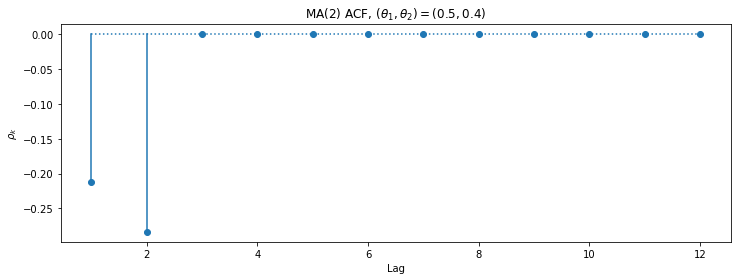

In [2]:
plot_ma2_acf(0.5, 0.4)

**(b)**

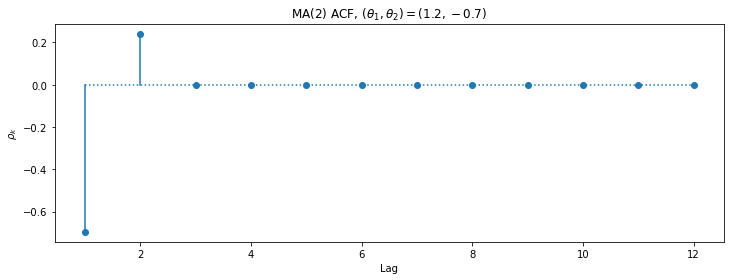

In [3]:
plot_ma2_acf(1.2, -0.7)

**(c)**

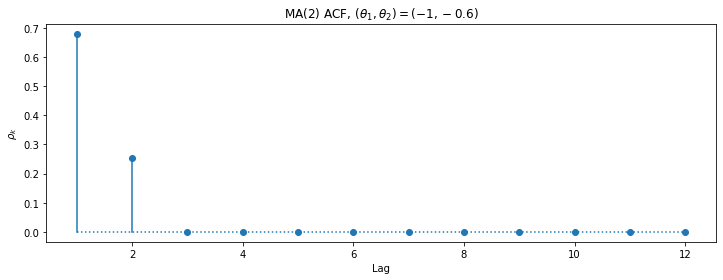

In [4]:
plot_ma2_acf(-1, -0.6)

**Exercise 4.3**.  Verify that for an MA(1) process

$$ \max_{-\infty < \theta < \infty} \rho_1 = 0.5 
\quad \text{and} \quad
\min_{-\infty < \theta < \infty} \rho_1 = -0.5 $$

**Solution**.  For a MA(1) process,

$$ \rho_1(\theta) = \frac{-\theta}{1 + \theta^2} $$

The derivative of this function is 

$$ \frac{d \rho_1(\theta)}{d\theta} = \frac{\theta^2 - 1}{(1 + \theta^2)^2} $$

which is only equal to zero on $\theta^2 = 1$, or $\theta = \pm 1$.  Therefore all global minimum and maximum values of $\rho_1$ are within $\theta \in \{-1, 1\}$.  It's easy to verify that $\rho_1(\theta_1 = -1) = 0.5$ and $\rho_1(\theta_1 = 1) = -0.5$, and so the result follows.

**Exercise 4.4**.  Show that when $\theta$ is replaced by $1 / \theta$, the autocorrelation function for an MA(1) process does not change.

**Solution**.  For a MA(1) process,

$$ \rho_1(\theta) = \frac{-\theta}{1 + \theta^2} $$

Therefore,

$$ \rho_1\left(\frac{1}{\theta}\right) = \frac{-\frac{1}{\theta}}{1 + \left(\frac{1}{\theta}\right)^2} =  \frac{-\theta}{1 + \theta^2} = \rho_1(\theta) $$

**Exercise 4.5**.  Calculate and sketch the autocorrelation functions for each of the following AR(1) models.  Plot for sufficient lags that the autocorrelation function has nearly died out.

**(a)** $\phi_1 = 0.6$.

**(b)** $\phi_1 = -0.6$.

**(c)** $\phi_1 = 0.95$. (Do out to 20 lags.)

**(d)** $\phi_3 = 0.3$.

**Solution**.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to compute autocorrelation from phi_1 for AR(1)
def ar1_rho(phi_1):
    def f(k):
        return phi_1**k
    
    return f

# Function to plot AR(1) autocorrelations for k = 1 to 20
def plot_ar1_acf(phi_1):
    max_k = 20
    f = ar1_rho(phi_1)
    k = [n for n in range(1, max_k + 1)]
    rho = [f(k) for k in range(1, max_k + 1)]
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, rho, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, rho):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(r'AR(1) ACF, $\phi_1 = ' + str(phi_1) + r'$')
    plt.show()

**(a)**

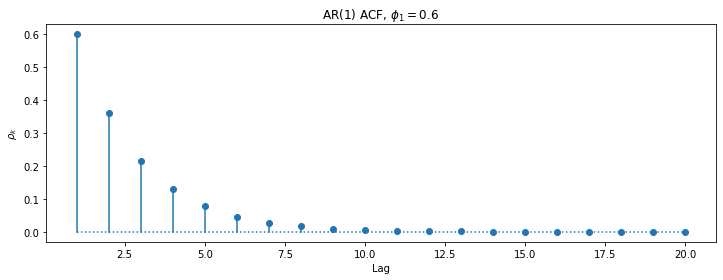

In [6]:
plot_ar1_acf(0.6)

**(b)**

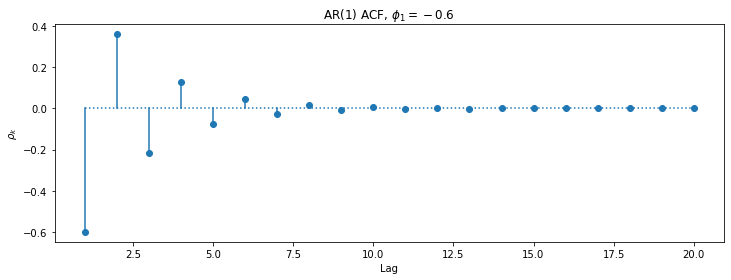

In [7]:
plot_ar1_acf(-0.6)

**(c)**

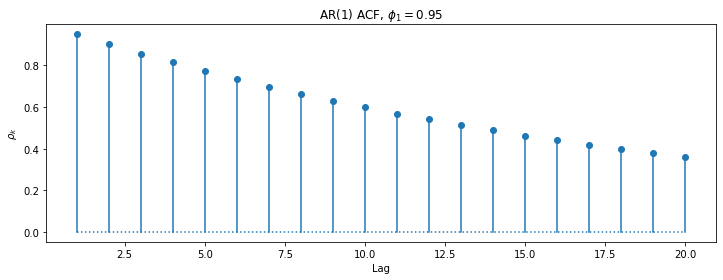

In [8]:
plot_ar1_acf(0.95)

**(d)**

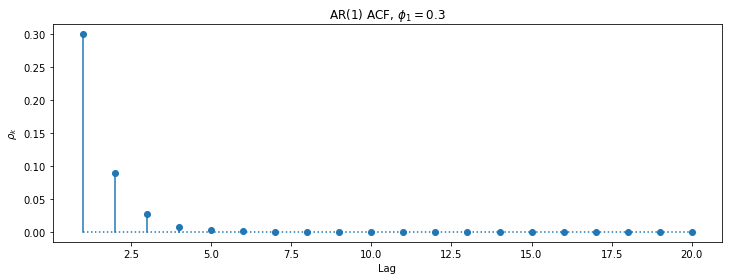

In [9]:
plot_ar1_acf(0.3)

**Exercise 4.6**.  Suppose that $\{Y_t\}$ is an AR(1) process with $-1 < \phi < +1$.

**(a)** Find the autocovariance function for $W_t = \nabla Y_t = Y_t - Y_{t - 1}$ in terms of $\phi$ and $\sigma_e^2$.

**(b)** In particular, show that $\text{Var}[W_t] = 2\sigma_e^2 / (1 + \phi)$.

**Solution**.

**(a and b)**

Let $\omega_k$ be the autocovariance of $\{Y_t\}$.  Then:

$$
\begin{align}
\gamma_k = \text{Cov}[W_t, W_{t - k}] &= \text{Cov}[Y_t - Y_{t - 1}, Y_{t - k} - Y_{t - k - 1}] \\
&= \text{Cov}[Y_t, Y_{t - k}] - \text{Cov}[Y_t, Y_{t - k - 1}] - \text{Cov}[Y_{t - 1}, Y_{t - k}] + \text{Cov}[Y_{t - 1}, Y_{t - k - 1}] \\
&= 2\omega_k - \omega_{k + 1} - \omega_{k - 1}
\end{align}
$$

But $\{Y_t\}$ is a AR(1) process, so

$$ \omega_k = \phi^{|k|} \frac{\sigma_e^2}{1 - \phi^2} $$

In particular,

$$ \gamma_0 = 2 \frac{\sigma_e^2}{1 - \phi^2} - 2 \phi \frac{\sigma_e^2}{1 - \phi^2}  = 2 \sigma_e^2 \frac{1 - \phi}{(1 + \phi)(1 - \phi)} = \frac{2 \sigma_e^2}{1 + \phi} $$

and for $k > 0$,

$$ \gamma_k = 2 \phi^k \frac{\sigma_e^2}{1 - \phi^2} - \phi^{k - 1} (1 + \phi^2) \frac{\sigma_e^2}{1 - \phi^2}
= \sigma_e^2 \phi^{k - 1} \frac{2\phi - 1- \phi^2}{1 - \phi^2} 
= - \sigma_e^2 \phi^{k - 1} \frac{(1 - \phi)^2}{(1 + \phi)(1 - \phi)}
= \frac{- \sigma_e^2 \phi^{k - 1} (1 - \phi) }{1 + \phi}
$$

So:

$$ \gamma_k = \begin{cases}
\frac{2 \sigma_e^2}{1 + \phi} &\text{for } k = 0 \\
\frac{- \sigma_e^2 \phi^{k - 1} (1 - \phi) }{1 + \phi} & \text{for } k > 1
\end{cases} $$

**Exercise 4.7**.  Describe the important characteristics of the autocorrelation function for the following models:

**(a)** MA(1)

**(b)** MA(2)

**(c)** AR(1)

**(d)** AR(2)

**(e)** ARMA(1, 1)

**Solution**.

**(a)**  MA(1) autocorrelation function has only the first lag as non-negative,

$$ \rho_1 = \frac{-\theta}{1 + \theta^2} 
\quad \text{and} \quad
\rho_k = 0 \quad \text{for } k > 1$$

This lag is at most 0.5, and at minimum -0.5.  Those extremes are reached at $\theta = -1$ and $\theta = 1$, respectively.

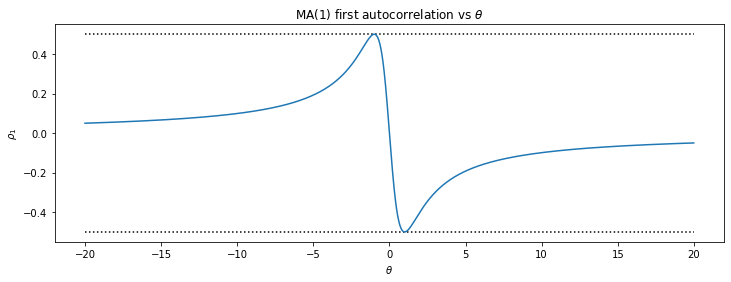

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

theta = np.arange(-20, 20, step=0.01)
rho_1 = -theta / (1 + theta**2)

plt.figure(figsize=(12, 4))
plt.plot(theta, rho_1)
plt.hlines([-0.5, 0.5], xmin=min(theta), xmax=max(theta), ls=':')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho_1$')
plt.title(r'MA(1) first autocorrelation vs $\theta$')
plt.show()

**(b)**  MA(2) autocorrelation function only has the first two lags as non-negative,

$$
\rho_1 = \frac{\theta_1 (\theta_2 - 1)}{1 + \theta_1^2 + \theta_2^2},
\quad
\rho_2 = \frac{-\theta_2}{1 + \theta_1^2 + \theta_2^2},
\quad
\rho_k = 0 \quad \text{for } k > 2
$$

The bounds on these values are:

$$ -\frac{1}{\sqrt{2}} \leq \rho_1 \leq \frac{1}{\sqrt{2}} 
\quad \text{and} \quad
-\frac{1}{2} \leq \rho_2 \leq \frac{1}{2}
$$

with limit values for $\rho_1$ reached at

$$
\underset{\theta_1, \theta_2}{\text{argmax}} \; \rho_1 = \left( -\sqrt{2}, -1 \right)
\quad \text{and} \quad
\underset{\theta_1, \theta_2}{\text{argmin}} \; \rho_1 = \left( \sqrt{2}, -1 \right)
$$

and limit values for $\rho_2$ reached at

$$
\underset{\theta_1, \theta_2}{\text{argmax}} \; \rho_2 = \left( 0, -1 \right)
\quad \text{and} \quad
\underset{\theta_1, \theta_2}{\text{argmin}} \; \rho_2 = \left( 0, 1 \right)
$$

The scenarios that maximize and minimize $\rho_2$ can be thought of as two MA(1) processes $\{A_t\}$ and $\{B_t\}$ with interleaving elements: $Y_{2t} = A_t$ and $Y_{2t + 1} = B_t$.

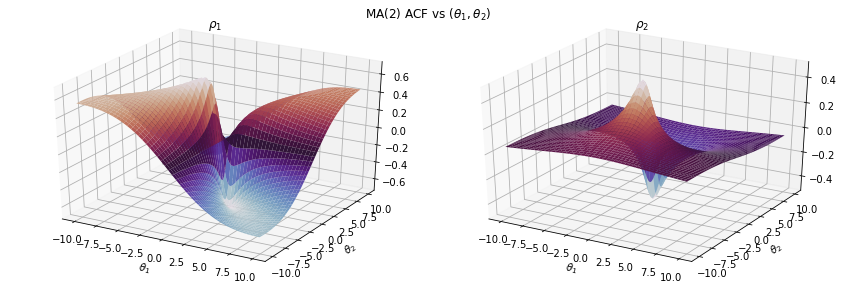

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

theta_1 = np.arange(-10, 10, 0.1)
theta_2 = np.arange(-10, 10, 0.1)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
rho_1 = theta_1 * (theta_2 - 1) / (1 + theta_1**2 + theta_2**2)
rho_2 = -theta_2 / (1 + theta_1**2 + theta_2**2)

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(theta_1, theta_2, rho_1, cmap=cm.twilight)
ax.set_title(r'$\rho_1$')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(theta_1, theta_2, rho_2, cmap=cm.twilight)
ax.set_title(r'$\rho_2$')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')

plt.suptitle(r'MA(2) ACF vs $(\theta_1, \theta_2)$')
plt.tight_layout()
plt.show()

**(c)**  Note that stationarity in AR(1) requires $|\phi| < 1$.  The autocorrelation function for the AR(1) process is a series of decaying powers of $\phi$,

$$ \gamma_k = \phi^k $$

For positive $\phi$, the values are all positive; for negative $\phi$, they oscillate.

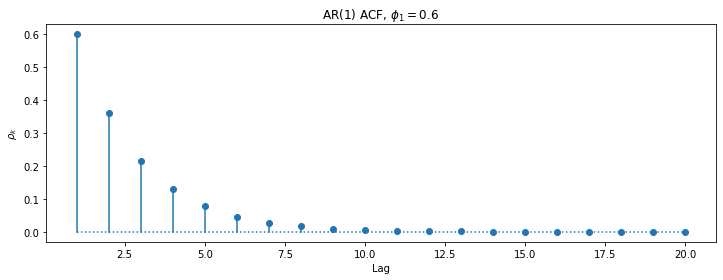

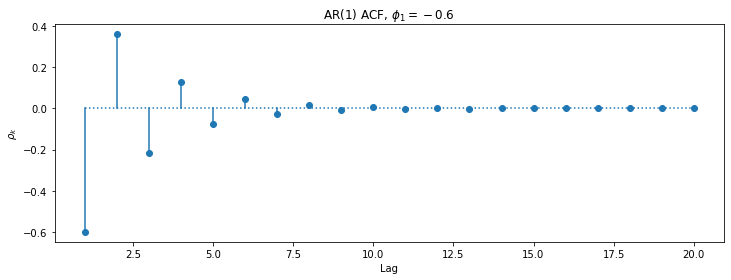

In [12]:
plot_ar1_acf(0.6)
plot_ar1_acf(-0.6)

**(d)**  The stationarity conditions for the AR(2) process are:

- $\phi_1 + \phi_2 < 1$
- $\phi_2 - \phi_1 < 1$
- $|\phi_2| < 1$

The autocorrelation coefficients satisfy the recursion

$$ \rho_k = \phi_1 \rho_{k - 1} + \phi_2 \rho_{k - 2} $$

with initial values

$$ \rho_0 = 1
\quad \text{and} \quad
\rho_1 = \frac{\phi_1}{1 - \phi_2}$$

To solve the recursion, if the characteristic equation $1 - \phi_1 x - \phi_2 x^2 = 0$ has inverse roots $G_1, G_2$, then for distinct roots

$$ \rho_k = \frac{(1 - G_2^2)G_1^{k + 1} + (1 - G_1^2)G_2^{k + 1}}{(G_1 - G_2)(1 + G_1 G_2)} $$

and for identical roots

$$ \rho_k = \left( 1 + \frac{1 + \phi_2}{1 - \phi_2} k \right)\left( \frac{\phi_1}{2} \right)^k $$

In either case, $\lim_{k \rightarrow \infty} \rho_k = 0$, though oscillations may occur.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to compute autocorrelation from phi for AR(2)
def ar2_rho(phi_1, phi_2):
    memoized = {}
    def f(k):
        if k == 0:
            return 1
        if k == 1:
            return phi_1 / (1 - phi_2)
        return phi_1 * f(k - 1) + phi_2 * f(k - 2)
    
    def memoized_f(k):
        if k in memoized:
            return memoized[k]
        x = f(k)
        memoized[k] = x
        return x
    
    return memoized_f

# Function to plot AR(2) autocorrelations for k = 1 to 20
def plot_ar2_acf(phi_1, phi_2):
    max_k = 20
    f = ar2_rho(phi_1, phi_2)
    k = [n for n in range(1, max_k + 1)]
    rho = [f(k) for k in range(1, max_k + 1)]
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, rho, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, rho):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(r'AR(2) ACF, $(\phi_1, \phi_2) = (' + str(phi_1) + ', ' + str(phi_2) + r')$')
    plt.show()

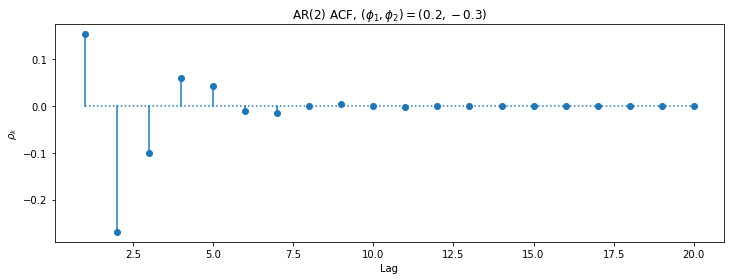

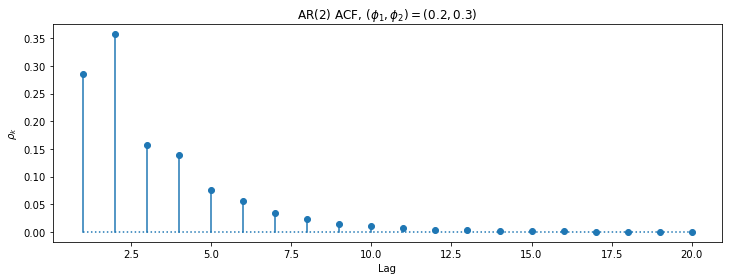

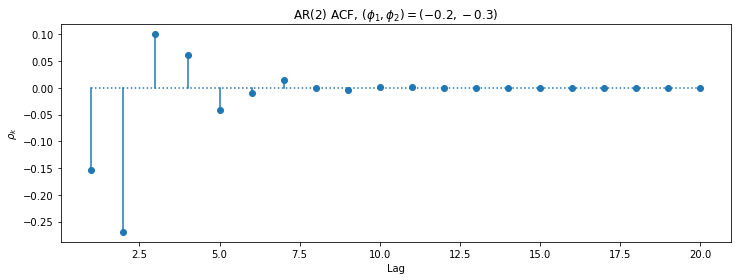

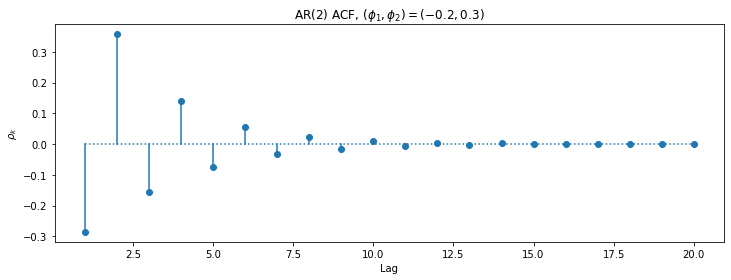

In [14]:
plot_ar2_acf(0.2, -0.3)
plot_ar2_acf(0.2, 0.3)
plot_ar2_acf(-0.2, -0.3)
plot_ar2_acf(-0.2, 0.3)

**(e)**  The ARMA(1) has the autocorrelation function

$$ \rho_k = \frac{(1 - \theta \phi)(\theta - \phi)}{1 - 2 \theta \phi + \theta^2} \phi^{k - 1} \quad \text{for } k \geq 1$$

which decays exponentially as the lag $k$ increases.  The damping factor is $\phi$, but decay starts from initial value $\rho_1$, which also depends on $\theta$.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to compute autocorrelation from theta, phi for ARMA(1, 1)
def arma11_rho(theta, phi):
    def f(k):
        if k == 0:
            return 1
        return phi**(k - 1) * (1 - theta * phi) * (theta - phi) / (1 - 2 * theta * phi + theta**2)
    
    return f

# Function to plot ARMA(1, 1) autocorrelations for k = 1 to 20
def plot_arma11_acf(theta, phi):
    max_k = 20
    f = arma11_rho(theta, phi)
    k = [n for n in range(1, max_k + 1)]
    rho = [f(k) for k in range(1, max_k + 1)]
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, rho, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, rho):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(r'ARMA(1, 1) ACF, $(\theta, \phi) = (' + str(theta) + ', ' + str(phi) + r')$')
    plt.show()

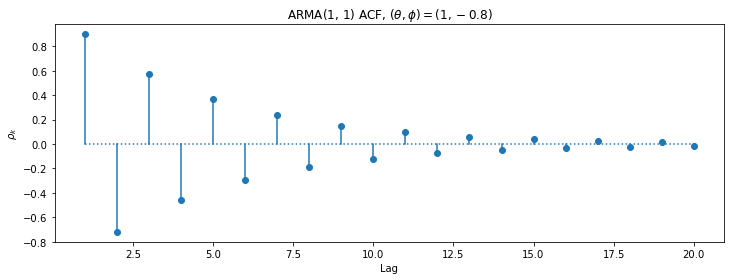

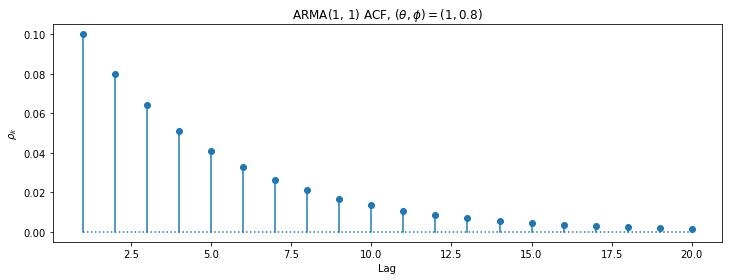

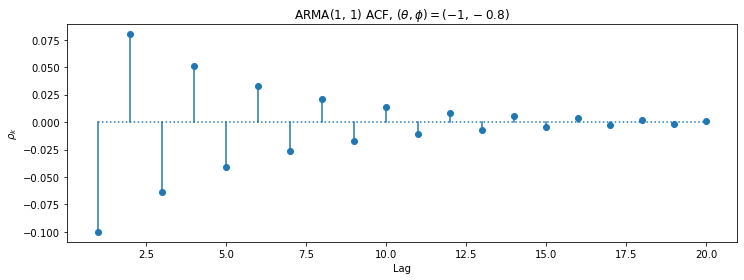

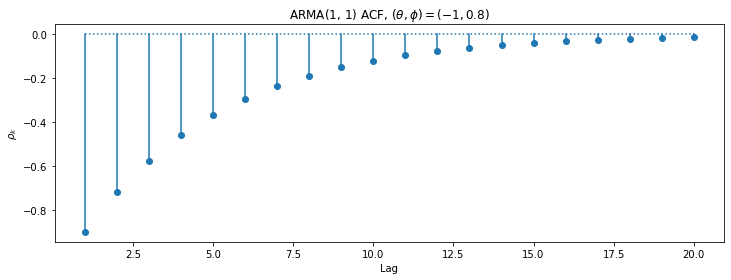

In [16]:
plot_arma11_acf(1, -0.8)
plot_arma11_acf(1, 0.8)
plot_arma11_acf(-1, -0.8)
plot_arma11_acf(-1, 0.8)

**Exercise 4.8**.  Let $\{Y_t\}$ be an AR(2) process of the special form $Y_t = \phi_2 Y_{t-2} + e_t$.  Use first principles to find the range of values of $\phi_2$ for which the process is stationary.

**Solution**.  We can decompose such a process into two independent series, $\{A_t\}$ and $\{B_t\}$, where $A_t = Y_{2t}$ and $B_t = Y_{2t + 1}$.  We then have

$$ A_t = \phi_2 A_{t - 1} + e_t \quad \text{and} \quad B_t = \phi_2 B_{t - 1} + e_t $$

We have that $\{Y_t\}$ is stationary only if both $\{A_t\}$ and $\{B_t\}$ are stationary -- which occurs only if $|\phi_2| < 1$, using stationary conditions for AR(1).

Note that this result is equivalent to using the stationary conditions with $\phi_1$ set to 0:

- $\phi_1 + \phi_2 < 1$
- $\phi_2 - \phi_1 < 1$
- $|\phi_2| < 1$

**Exercise 4.9**.  Use the recursive formula of Equation (4.3.13) to calculate and then sketch the autocorrelation function for the following AR(2) models with parameters as specified.  In each case, specify whether the roots of the characteristic equation are real or complex.  If the roots are complex, find the damping factor, $R$, and frequency, $\Theta$, for the corresponding autocorrelation function when expressed as in Equation (4.3.17), on page 73.

**(a)** $\phi_1 = 0.6$ and $\phi_2 = 0.3$.

**(b)** $\phi_1 = -0.4$ and $\phi_2 = 0.5$.

**(c)** $\phi_1 = 1.2$ and $\phi_2 = -0.7$.

**(d)** $\phi_1 = -1$ and $\phi_2 = -0.6$.

**(e)** $\phi_1 = 0.5$ and $\phi_2 = -0.9$.

**(f)** $\phi_1 = - 0.5$ and $\phi_2 = -0.6$.

**Solution**.

In [17]:
def is_stationary(phi_1, phi_2):
    return phi_1 + phi_2 < 1 and phi_2 - phi_1 < 1 and np.abs(phi_2) < 1

def has_complex_roots(phi_1, phi_2):
    return phi_1**2 + 4 * phi_2 < 0

def damping_factor(phi_1, phi_2):
    return np.sqrt(-phi_2)

def frequency(phi_1, phi_2):
    return np.arccos(phi_1 / (2 * np.sqrt(-phi_2)))

def phase(phi_1, phi_2):
    return np.arctan((1 - phi_2) / (1 + phi_2))

def do_analysis(phi_1, phi_2):
    if not is_stationary(phi_1, phi_2):
        print('Not stationary')
        return
    
    if has_complex_roots(phi_1, phi_2):
        print('Complex roots')
        print('Damping factor: %e' % damping_factor(phi_1, phi_2))
        print('Frequency: %e' % frequency(phi_1, phi_2))
        print('Phase: %e' % phase(phi_1, phi_2))
    else:
        print('Real roots')

**(a)**

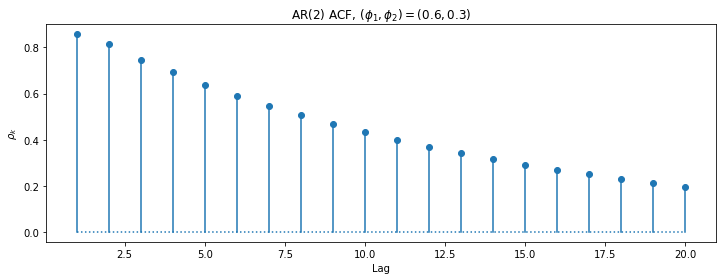

Real roots


In [18]:
phi_1, phi_2 = 0.6, 0.3
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(b)**

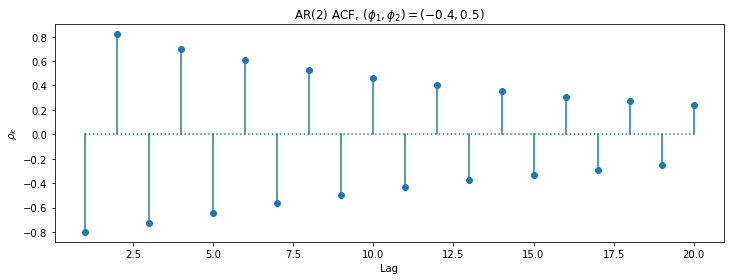

Real roots


In [19]:
phi_1, phi_2 = -0.4, 0.5
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(c)**

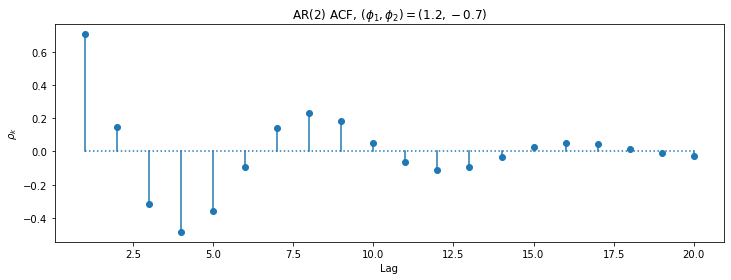

Complex roots
Damping factor: 8.366600e-01
Frequency: 7.711105e-01
Phase: 1.396124e+00


In [20]:
phi_1, phi_2 = 1.2, -0.7
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(d)**

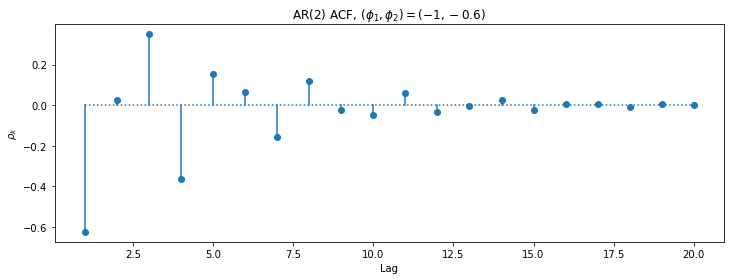

Complex roots
Damping factor: 7.745967e-01
Frequency: 2.272470e+00
Phase: 1.325818e+00


In [21]:
phi_1, phi_2 = -1, -0.6
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(e)**

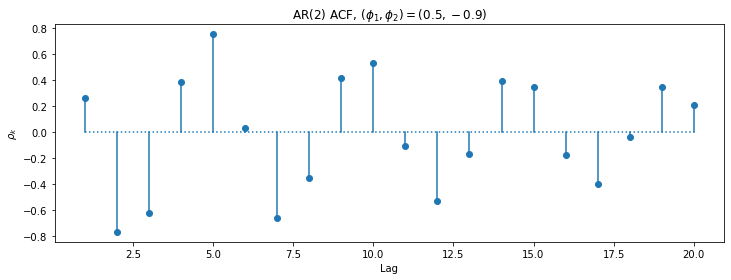

Complex roots
Damping factor: 9.486833e-01
Frequency: 1.304124e+00
Phase: 1.518213e+00


In [22]:
phi_1, phi_2 = 0.5, -0.9
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(f)**

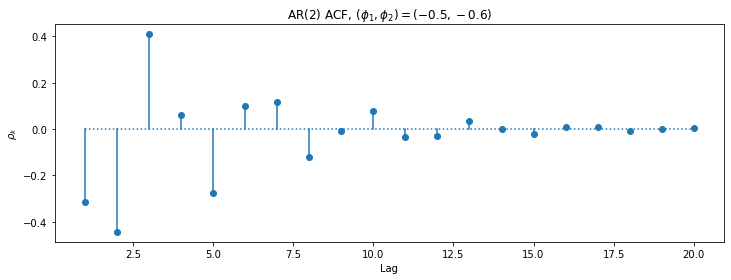

Complex roots
Damping factor: 7.745967e-01
Frequency: 1.899428e+00
Phase: 1.325818e+00


In [23]:
phi_1, phi_2 = -0.5, -0.6
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**Exercise 4.10**.  Sketch the autocorrelation function for each of the following ARMA models:

**(a)** ARMA(1, 1) with $\phi = 0.7$ and $\theta = 0.4$.

**(b)** ARMA(1, 1) with $\phi = 0.7$ and $\theta = -0.4$.

**Solution**.

**(a)**

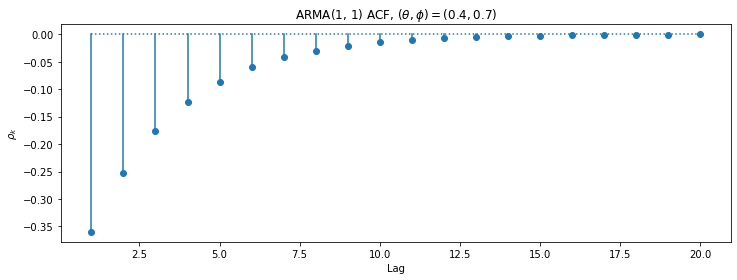

In [24]:
plot_arma11_acf(phi=0.7, theta=0.4)

**(b)**

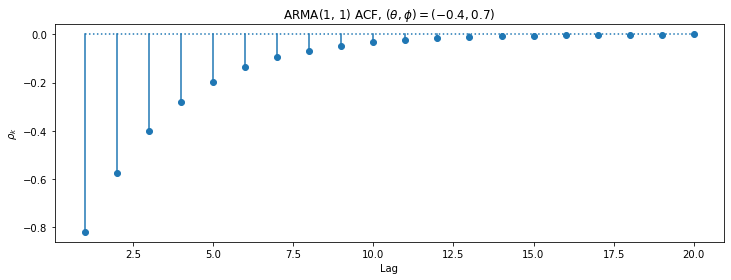

In [25]:
plot_arma11_acf(phi=0.7, theta=-0.4)

Note the change if scale in the y-axis.